In [149]:
# load model 
# import joblib
# ada_model = joblib.load('ada_model.pkl')
# scaler = joblib.load('scaler.pkl')

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
pd.set_option('display.max_columns', None)

In [152]:
df = pd.read_csv('kuisioner.csv')
dfc = df.copy()
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 29 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                                                                                                229 non-null    object
 1   Nama Lengkap                                                                                                                                                                             229 non-null    object
 2   Jenis Kelamin                         

In [153]:
iat_col = ["IAT-IAT_03","IAT-IAT_04","IAT-IAT_15","IAT-IAT_01","IAT-IAT_13","IAT-IAT_11","IAT-IAT_07",
           "IAT-IAT_02","IAT-IAT_18","IAT-IAT_06","IAT-IAT_19","IAT-IAT_17","IAT-IAT_14","IAT-IAT_16","IAT-IAT_12",
           "IAT-IAT_20","IAT-IAT_05","IAT-IAT_09","IAT-IAT_08","IAT-IAT_10"]
mapping_name = {
    'Jenis Kelamin': 'Basic_Demos-Sex',
    'Usia': 'Basic_Demos-Age'
}
dfc.rename(columns=mapping_name, inplace=True)
dfc.rename(columns=dict(zip(dfc.iloc[:,8:28].columns, iat_col)), inplace=True)
dfc.rename(columns={dfc.columns[-1]:'PreInt_EduHx-computerinternet_hoursday'}, inplace=True)

In [154]:
dfc['Berapa Tinggi Badan Anda?'] = dfc['Berapa Tinggi Badan Anda?'].str.extract(r'(\d+)').astype(float)
dfc['Berapa Berat Badan Anda?'] = dfc['Berapa Berat Badan Anda?'].str.extract(r'(\d+)').astype(float)
dfc['Basic_Demos-Age'] = dfc['Basic_Demos-Age'].str.extract(r'(\d+)').astype(float)

In [155]:
# Fill missing height values by gender
height_median_male = dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Berapa Tinggi Badan Anda?'].median()
height_median_female = dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Berapa Tinggi Badan Anda?'].median()

dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Berapa Tinggi Badan Anda?'] = dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Berapa Tinggi Badan Anda?'].fillna(height_median_male)
dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Berapa Tinggi Badan Anda?'] = dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Berapa Tinggi Badan Anda?'].fillna(height_median_female)

# Fill missing weight values by gender
weight_median_male = dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Berapa Berat Badan Anda?'].median()
weight_median_female = dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Berapa Berat Badan Anda?'].median()

dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Berapa Berat Badan Anda?'] = dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Berapa Berat Badan Anda?'].fillna(weight_median_female)
dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Berapa Berat Badan Anda?'] = dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Berapa Berat Badan Anda?'].fillna(weight_median_male)

In [156]:
dfc['Physical-BMI'] = dfc['Berapa Berat Badan Anda?'] / ((dfc['Berapa Tinggi Badan Anda?']/100) ** 2)
dfc['IAT-IAT_Total'] = dfc[iat_col].sum(axis=1)
dfc['Basic_Demos-Sex'] = dfc['Basic_Demos-Sex'].map({'Laki-laki': 0, 'Perempuan': 1})

In [157]:
col_to_drop = ['Timestamp', 'Nama Lengkap','Angkatan', 'NIM']
dfc.drop(columns=col_to_drop, inplace=True)
dfc.drop(['Berapa Tinggi Badan Anda?','Berapa Berat Badan Anda?'], axis=1, inplace=True)

In [158]:
index_col = ['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI', 'IAT-IAT_01','IAT-IAT_02','IAT-IAT_03','IAT-IAT_04','IAT-IAT_05',
             'IAT-IAT_06','IAT-IAT_07','IAT-IAT_08','IAT-IAT_09','IAT-IAT_10','IAT-IAT_11','IAT-IAT_12',
             'IAT-IAT_13','IAT-IAT_14','IAT-IAT_15','IAT-IAT_16','IAT-IAT_17','IAT-IAT_18','IAT-IAT_19',
             'IAT-IAT_20', 'IAT-IAT_Total', 'PreInt_EduHx-computerinternet_hoursday']
dfc = dfc.reindex(columns=index_col)

In [159]:
# from joblib import load
# ada_model = load('ada_model_noCV.pkl')
# scaler = load('scaler.pkl')
# X_new = dfc.values
# X_new_scaled = scaler.transform(X_new)
# sii = ada_model.predict(X_new_scaled)

In [160]:
from joblib import load
model = load('svm_model_pipeline_noCV.pkl')
X_new = dfc.values
sii = model.predict(X_new)


d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator NearestNeighbors from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: Inconsi

In [161]:
df['sii'] = sii

In [162]:
df['sii'].value_counts()

sii
2.0    152
1.0     52
0.0     21
3.0      4
Name: count, dtype: int64

<Axes: xlabel='IAT-IAT_Total', ylabel='Count'>

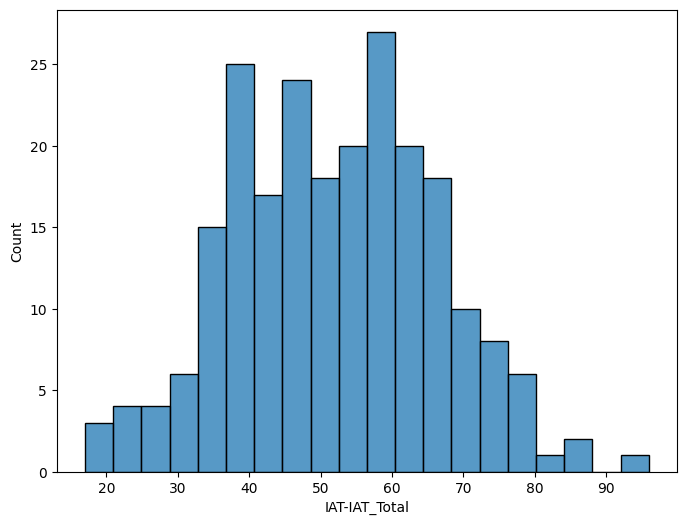

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(data=dfc, x='IAT-IAT_Total', bins=20)

In [164]:
df['iat_total'] = dfc['IAT-IAT_Total']

In [165]:
df['sii'].value_counts()

sii
2.0    152
1.0     52
0.0     21
3.0      4
Name: count, dtype: int64

In [166]:
df[df['iat_total'] > 90]

,Timestamp,Nama Lengkap,Jenis Kelamin,Angkatan,NIM,Usia,Berapa Tinggi Badan Anda?,Berapa Berat Badan Anda?,"Seberapa sering Anda lebih memilih menghabiskan waktu di Internet dibandingkan dengan teman, keluarga, atau sosial lainnya?",Seberapa sering Anda menjalin hubungan baru (teman) dengan sesama pengguna online?,"Seberapa sering Anda merasa sibuk memikirkan internet saat sedang offline, atau membayangkan kapan akan online lagi","Seberapa sering Anda berkata pada diri sendiri, ""hanya beberapa menit lagi,"" saat sedang online?",Seberapa sering Anda online lebih lama dari yang Anda niatkan?,Seberapa sering Anda mencoba mengurangi jumlah waktu yang Anda habiskan online namun gagal?,Seberapa sering Anda memeriksa email atau pesan sebelum melakukan hal lain yang perlu Anda lakukan?,Seberapa sering Anda mengabaikan pekerjaan di rumah untuk menghabiskan lebih banyak waktu online?,Seberapa sering kinerja atau produktivitas pekerjaan Anda menurun karena internet?,Seberapa sering nilai atau hasil studi Anda menurun karena jumlah waktu yang Anda habiskan online?,Seberapa sering Anda lebih memilih untuk menghabiskan waktu online daripada pergi keluar dengan orang lain?,Seberapa sering Anda menantikan waktu berikutnya untuk bisa online?,"Seberapa sering Anda takut hidup tanpa internet akan terasa membosankan, hampa, dan tidak menyenangkan?","Seberapa sering Anda membentak, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat sedang online?",Seberapa sering Anda kurang tidur karena sesi online hingga larut malam?,"Seberapa sering Anda merasa depresi, murung, atau gugup saat sedang offline, yang kemudian hilang begitu Anda kembali online?",Seberapa sering orang lain dalam hidup Anda mengeluh tentang jumlah waktu yang Anda habiskan online?,Seberapa sering Anda mencoba menyembunyikan berapa lama Anda telah online?,"Seberapa sering Anda menggunakan internet sebagai cara untuk lari dari masalah atau untuk meredakan perasaan tidak nyaman (misalnya, perasaan tidak berdaya, bersalah, cemas, depresi)?","Seberapa sering Anda membahayakan atau mempertaruhkan hilangnya hubungan penting, pekerjaan, atau kesempatan pendidikan/karier karena internet?",Berapa lama rata-rata Anda menggunakan internet dalam satu hari?,sii,iat_total
68,12/10/2025 23:06:49,Alan,Laki-laki,2022,11220930000043,20,162,65,4,5,5,5,5,5,4,5,5,5,5,4,5,5,5,4,5,5,5,5,3,3.0,96


In [167]:
df[df['sii']==1]

,Timestamp,Nama Lengkap,Jenis Kelamin,Angkatan,NIM,Usia,Berapa Tinggi Badan Anda?,Berapa Berat Badan Anda?,"Seberapa sering Anda lebih memilih menghabiskan waktu di Internet dibandingkan dengan teman, keluarga, atau sosial lainnya?",Seberapa sering Anda menjalin hubungan baru (teman) dengan sesama pengguna online?,"Seberapa sering Anda merasa sibuk memikirkan internet saat sedang offline, atau membayangkan kapan akan online lagi","Seberapa sering Anda berkata pada diri sendiri, ""hanya beberapa menit lagi,"" saat sedang online?",Seberapa sering Anda online lebih lama dari yang Anda niatkan?,Seberapa sering Anda mencoba mengurangi jumlah waktu yang Anda habiskan online namun gagal?,Seberapa sering Anda memeriksa email atau pesan sebelum melakukan hal lain yang perlu Anda lakukan?,Seberapa sering Anda mengabaikan pekerjaan di rumah untuk menghabiskan lebih banyak waktu online?,Seberapa sering kinerja atau produktivitas pekerjaan Anda menurun karena internet?,Seberapa sering nilai atau hasil studi Anda menurun karena jumlah waktu yang Anda habiskan online?,Seberapa sering Anda lebih memilih untuk menghabiskan waktu online daripada pergi keluar dengan orang lain?,Seberapa sering Anda menantikan waktu berikutnya untuk bisa online?,"Seberapa sering Anda takut hidup tanpa internet akan terasa membosankan, hampa, dan tidak menyenangkan?","Seberapa sering Anda membentak, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat sedang online?",Seberapa sering Anda kurang tidur karena sesi online hingga larut malam?,"Seberapa sering Anda merasa depresi, murung, atau gugup saat sedang offline, yang kemudian hilang begitu Anda kembali online?",Seberapa sering orang lain dalam hidup Anda mengeluh tentang jumlah waktu yang Anda habiskan online?,Seberapa sering Anda mencoba menyembunyikan berapa lama Anda telah online?,"Seberapa sering Anda menggunakan internet sebagai cara untuk lari dari masalah atau untuk meredakan perasaan tidak nyaman (misalnya, perasaan tidak berdaya, bersalah, cemas, depresi)?","Seberapa sering Anda membahayakan atau mempertaruhkan hilangnya hubungan penting, pekerjaan, atau kesempatan pendidikan/karier karena internet?",Berapa lama rata-rata Anda menggunakan internet dalam satu hari?,sii,iat_total
13,08/09/2025 11:05:37,Aryo Suryo Prapto,Laki-laki,2021,11210930000019,22,170,49,2,3,2,3,2,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,1.0,45
15,08/09/2025 11:51:16,mella safitri,Perempuan,2021,11210930000011,22,157,37,3,1,2,3,3,4,2,1,2,2,3,3,3,1,0,1,1,1,4,0,2,1.0,40
30,08/09/2025 20:09:32,Winda Yulitasari,Perempuan,2023,11230930000106,20,160,45,5,2,2,3,4,3,2,1,2,1,3,3,4,1,1,0,2,2,4,0,3,1.0,45
34,08/09/2025 20:46:40,Raden Achmad Zildhan Frans Bestand,Laki-laki,2023,11230930000017,20,165,80,4,2,1,2,3,3,4,3,2,2,2,2,2,1,1,2,2,2,3,1,3,1.0,44
42,09/09/2025 20:54:29,Naya Raila,Perempuan,2023,11230930000015,20,NaN,NaN,4,1,4,4,4,4,4,0,2,0,1,2,1,0,0,1,1,1,0,0,3,1.0,34
48,19/09/2025 19:40:12,Salsabila Nursalima,Perempuan,2024,12409031030069,19,160,NaN,2,0,1,2,3,3,2,2,3,2,4,1,0,1,2,0,1,1,3,0,3,1.0,33
59,11/10/2025 11:54:13,Mohammad Novrizal Sugiarto,Laki-laki,2021,11210930000043,23,170,74,5,1,3,2,4,3,1,1,2,1,3,1,1,1,3,1,1,1,2,1,3,1.0,38
69,13/10/2025 11:53:03,Fadhlil Jamal,Laki-laki,2022,11220930000075,23,170,63,2,2,1,3,3,3,1,1,3,3,2,1,2,1,3,2,2,3,3,1,3,1.0,42
73,13/10/2025 22:21:25,Syifa Aulia Putri,Perempuan,2022,11220930000010,21,150,59,2,1,1,3,5,3,1,1,1,0,0,1,2,2,3,1,1,1,3,1,2,1.0,33
74,13/10/2025 22:30:51,Widhi Damar Anandito,Laki-laki,2022,11220930000028,21,173,61,3,0,4,5,4,4,4,3,2,1,3,3,1,0,1,0,1,0,1,0,3,1.0,40
